In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as pieplt1
import matplotlib.pyplot as pieplt2
import matplotlib.pyplot as pieplt3
import pandas as pd
import numpy as np

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df.head()
# Combine the data into a single dataset
ride_data_complete = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
ride_data_complete.head()
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


## Bubble Plot of Ride Sharing Data

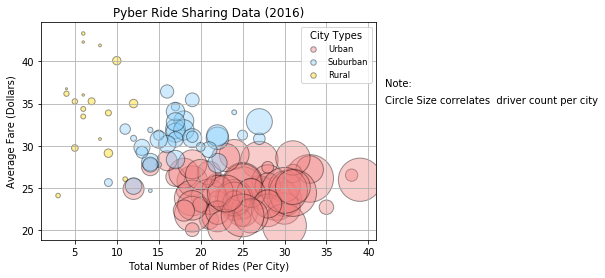

In [2]:
# Obtain the x and y coordinates for each of the three city types

cityType = ride_data_complete.type.unique()
cityType

#plt1.figure(figsize=(10,8))

plt1.title("Pyber Ride Sharing Data (2016)")

# Incorporate a text label regarding circle size
plt1.text(42, 37,'Note:')
plt1.text(42, 35,'Circle Size correlates  driver count per city')

for type in cityType:
    rideSlice = ride_data_complete[ride_data_complete['type']==type]
    averageFare = rideSlice.groupby(["city"]).mean()["fare"].reset_index()
    averageFare = averageFare.iloc[:,1].values
    
    rideCount = rideSlice.groupby(["city"]).count()["ride_id"].reset_index()
    rideCount = rideCount.iloc[:,1].values
    
    driverCount = rideSlice.groupby(["city"]).sum()["driver_count"].reset_index()
    driverCount = driverCount.iloc[:,1].values
    
    if type == 'Urban':
        color = 'lightcoral'
    if type == 'Suburban':
        color = 'lightskyblue'
    if type == 'Rural':
        color = 'gold'
   
       
    # Build the scatter plots for each city types
    plt1.scatter(rideCount, averageFare,c=color, marker="o", edgecolors="black", s=driverCount, alpha=.4,label=type)
    



# Incorporate the other graph properties
plt1.xlabel("Total Number of Rides (Per City)")
plt1.ylabel("Average Fare (Dollars)")
plt1.grid(True)
# Create a legend
lgnd=plt1.legend(fontsize="small",mode="Expanded",numpoints=1,scatterpoints=1,loc="best",title="City Types",labelspacing=.5)
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
#plt1.legend( )

# Save Figure
plt1.savefig("avgFareScatterPlot.png")

In [11]:
#
#Obeservation:
#There is a strong relaion between the City Type , Total No of Rides , Average Fare & Driver Count
#The avreage fare in Rural type is high compared to suburban and Urban areas.
#The driver count and total no of rides is significantly less  in Rural area as against Suburban and Urban areas
#Urban type has more number of rides, more drivers and less Fare. 
#Basically it boils down to Demand Vs Supply, the more the number of riders, more the number of drivers and lesser the average fare.
#For a consumer it is expensive to take a ride in Rural area


In [3]:
# Show plot
plt1.show()
plt1.tight_layout()

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

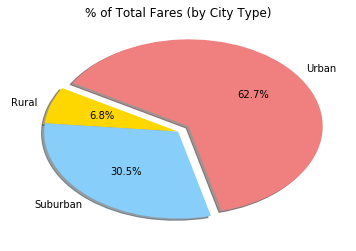

<Figure size 432x288 with 0 Axes>

In [4]:
# Calculate Type Percents
totalFares=ride_data_complete.sum()["fare"]
rideDataTotalFaresByTypePct=(ride_data_complete.groupby(["type"]).sum()["fare"]/totalFares)*100
rideDataTotalFaresByTypePct

cityType.sort(axis=0)

members = rideDataTotalFaresByTypePct
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
pieplt1.title("% of Total Fares (by City Type)")
pieplt1.pie(members, explode=explode, labels=cityType, colors=colors, autopct="%1.1f%%", shadow=True,startangle=150)
pieplt1.axis("off")
pieplt1.show()

rideDataTotalFaresByTypePct
# Save Figure
pieplt1.savefig("pieChartTotalfareByCityType.png")


In [ ]:
##Observation:
#Greatest Revenue for Pyber comes from the Urban areas and that is 62.7%
#The least revenue comes from Rural areas where the driver count is also less, possibly due to the less demand
#

## Total Rides by City Type

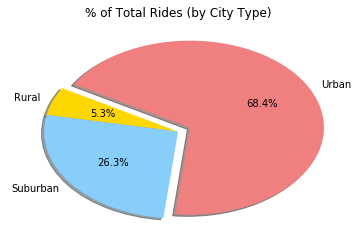

In [5]:
# Calculate Ride Percents


totalRides=ride_data_complete.count()['ride_id']
totalRides
totalRideByTypePct=(ride_data_complete.groupby(["type"]).count()["ride_id"]/totalRides)*100
totalRideByTypePct


cityType.sort(axis=0)

members = totalRideByTypePct
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
pieplt2.title("% of Total Rides (by City Type)")
pieplt2.pie(members, explode=explode, labels=cityType, colors=colors, autopct="%1.1f%%", shadow=True,startangle=150)
pieplt2.axis("off")

# Save Figure
pieplt2.savefig("pieCharttotalRidesByCityType.png")

In [6]:
# Show Figure
pieplt2.show()

In [ ]:
#Observation:
#The total number of rides are high in Urban area. This means that the most number of consumers for Pyber is in 
#Urban area and the least number of consumers are in Rural area.

## Total Drivers by City Type

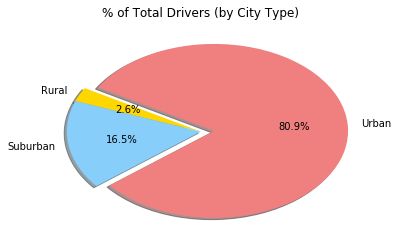

In [7]:
# Calculate Driver Percents
totalDrivers=city_data_df.sum()['driver_count']
totalDrivers
totalDriversByTypePct=(city_data_df.groupby(["type"]).sum()["driver_count"]/totalDrivers)*100
totalDriversByTypePct
# Build Pie Charts
cityType.sort(axis=0)

members = totalDriversByTypePct
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

# Build Pie Chart
pieplt3.title("% of Total Drivers (by City Type)")
pieplt3.pie(members, explode=explode, labels=cityType, colors=colors, autopct="%1.1f%%", shadow=True,startangle=150)
pieplt3.axis("off")
totalDriversByTypePct

ride_data_complete.groupby(["type"]).sum()["driver_count"]

# Save Figure
pieplt3.savefig("pieCharttotalDriversByCityType.png")


In [8]:
# Show Figure
pieplt3.show()

In [ ]:
#Observation:
#The urban area has the highest number of drivers as compared to Rural and suburbs. This directly correlates to the number 
#of rides and number of Customers.